In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split
from matplotlib import pyplot

from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

In [3]:
def compareAlgorithmsForBarChart(X_train, y_train):
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GB', GradientBoostingClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    auc_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        auc_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        #print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        #print(recall_results)    # for testing only
        auc_results.append(auc_cv_results.mean())
        #print(auc_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        #print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, auc_results, f05_results, names

In [4]:
# function will  apply RUS to each ML model and find F05, precision, recall and AUC
def compareAlgorithmsRUS(X_train, y_train):

    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GB', GradientBoostingClassifier()))



    # evaluate each model in turn
    precision_results = []
    recall_results = []
    auc_results = []
    f05_results = []

    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False) 
    
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        auc_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf,
                                                         scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        auc_results.append(auc_cv_results.mean())
        f05_results.append(f05_cv_results.mean())

        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, auc_results, f05_results, names

In [5]:
# function will  apply SMOTE to each ML model and find F05, precision, recall and AUC

def compareAlgorithmsSMOTE(X_train, y_train):

    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GB', GradientBoostingClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    auc_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        auc_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf,
                                                         scoring='roc_auc')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        auc_results.append(auc_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, auc_results, f05_results, names

In [36]:
def threeGroupsBarChart(results1, string1, results2, string2, results3, string3, score, name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = names

    y = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.barh(y - width, results1, width, label=string1)
    rects2 = ax.barh(y, results2, width, label=string2)
    rects3 = ax.barh(y + width, results3, width, label=string3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_yticks(y, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    #ax.set_ylabel(labels)
    ax.set_title(score)
    ax.set_xlabel(score)
    #ax.set_xticklabels(labels)
    #ax.legend()
    
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    #plt.legend()
    plt.xlim(0,1)
    
    # label bars
    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=8)
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=8)
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=8)

    fig.tight_layout()
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName, bbox_inches='tight')
    
    plt.show()

In [7]:
def oneGroupBarChart(results, score, title, name):

    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots()

    #people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
    labels = names 
    width = 0.2  # the width of the bars

    y_pos = np.arange(len(labels))

    ax.barh(y_pos, results, width, align='center')
    ax.set_yticks(y_pos, labels=labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(score)
    ax.set_title(title)
    plt.xlim(0,1)
    
    # annotate bars
    ax.bar_label(ax.containers[0], padding=5, label_type='edge', fmt='%.2f')
    
    fig.tight_layout()
    
    fileName = name +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName)

    plt.show()

In [8]:
# plot results to compare between balanced and imbalanced data

def barChartBalancing(imbalancedResults, rusResults, smoteResults, score, title, string):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    #make font bigger
    font = {'size'   : 13}

    matplotlib.rc('font', **font)
    
    labels = names
    
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,9))
    rects1 = ax.bar(x - width, imbalancedResults, width, label='Imbalanced Dataset')
    rects2 = ax.bar(x , rusResults, width, label='RandomUnderSampler')
    rects3 = ax.bar(x + width, smoteResults, width, label='SMOTE')
    

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation='vertical')
    #ax.legend(loc='upper center')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")


    
    # annotate all bars
#    i=0
#    for container in ax.containers:
#        ax.bar_label(ax.containers[i], label_type='edge', fmt='%.2f')
#        i=i+1

    ax.bar_label(rects1, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')
    ax.bar_label(rects2, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')
    ax.bar_label(rects3, padding=3, fmt='%.2f', label_type='edge', fontsize=10, rotation='vertical')

    fig.tight_layout()
    
    fileName = string +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName)
    
    plt.show()


In [32]:
def plotROCCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import plot_roc_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_roc_curve(model, X_test, y_test, ax = plt.gca(), name = name)

        
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    
    #ax.legend(loc='lower right')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName, bbox_inches='tight')
    
    plt.show()

In [42]:
def plotPrecisionRecallCurves(X_train, X_test, y_train, y_test, title, filename):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('NB', GaussianNB()))
    models.append(('MLP', MLPClassifier()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ADABOOST', AdaBoostClassifier()))
    models.append(('GB', GradientBoostingClassifier()))
    
    names = []
    
    fig, ax = plt.subplots()
    
    # fit each model in turn
    for name, model in models:
        names.append(name)
        model.fit(X_train,y_train)
        plot_precision_recall_curve(model, X_test, y_test, ax = plt.gca(), name = name)
        
        
    
    no_skill = len(y_test[y_test['0']==1]) / len(y_test)

    plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
    
    #ax.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
        
    plt.title(title)
    
    fig.tight_layout()
    
    # save plot
    fileName = filename +'.png'
    print(fileName)
    plt.savefig('figures/resampling/' + fileName, bbox_inches='tight')
    
    plt.show()

# BiB

In [11]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [12]:
# find imbalanced data model results
precision_results, recall_results, auc_results, f05_results, names = compareAlgorithmsForBarChart(X_train,y_train)

In [13]:
# RUS results
precision_rus, recall_rus, auc_rus, f05_rus, names= compareAlgorithmsRUS(X_train, y_train)

# SMOTE results
precision_sm, recall_sm, auc_sm, f05_sm, names= compareAlgorithmsSMOTE(X_train, y_train)

## BiB and RUS

In [ ]:
#plot RUS models sensitivity, precision, F0.5, ROC and PR curves

precision_RUS.png


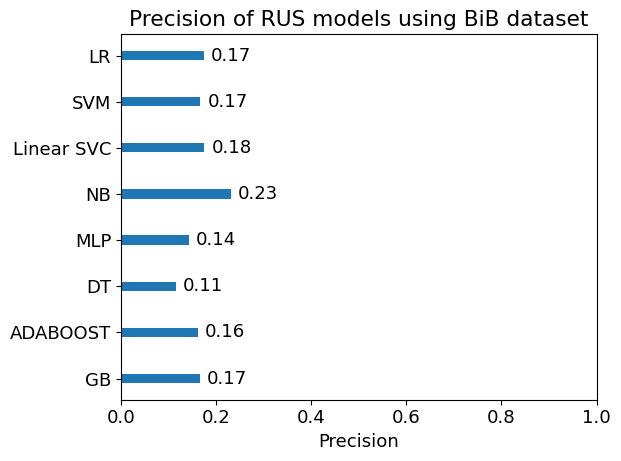

recall_RUS.png


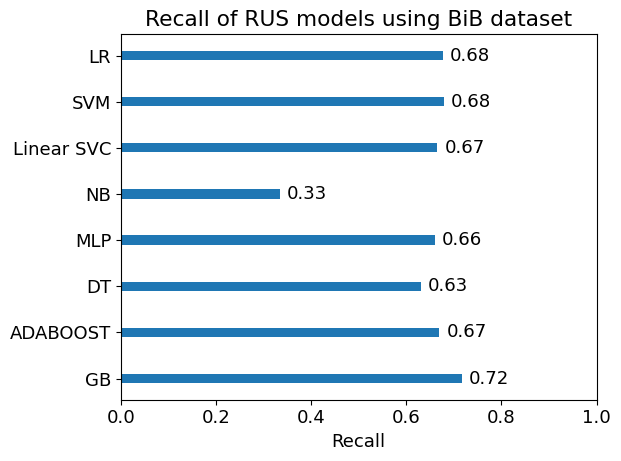

f05_RUS.png


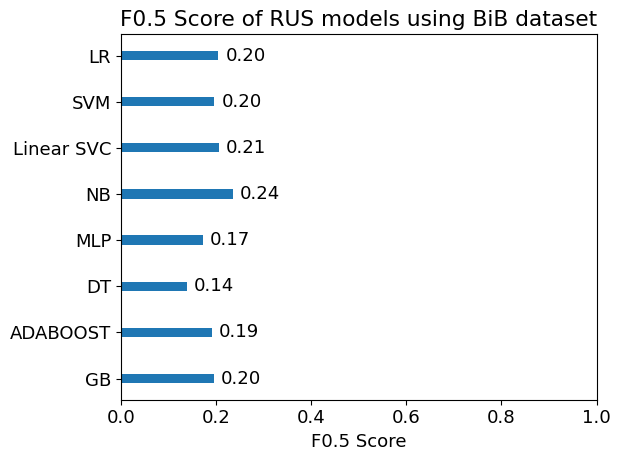

In [31]:
oneGroupBarChart(precision_rus, "Precision", "Precision of RUS models using BiB dataset", "precision_RUS")
oneGroupBarChart(recall_rus, "Recall", "Recall of RUS models using BiB dataset", "recall_RUS")
oneGroupBarChart(f05_rus, "F0.5 Score", "F0.5 Score of RUS models using BiB dataset", "f05_RUS")

rus_precision-recall.png


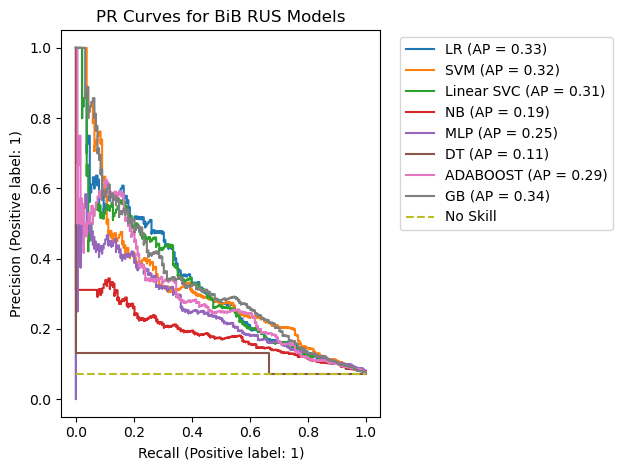

rus_roc.png


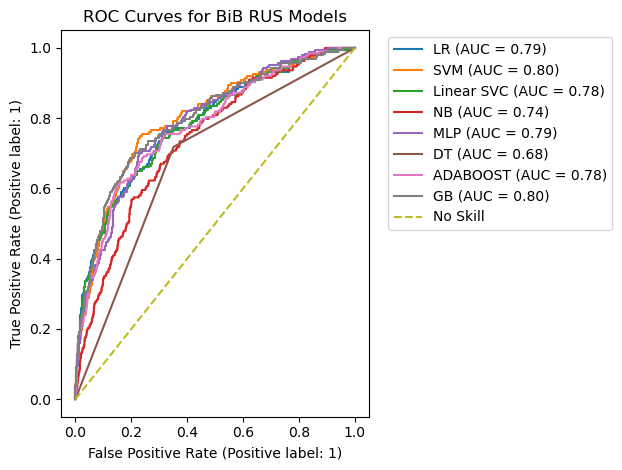

In [15]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#plot ROC curves for all RUS models
plotPrecisionRecallCurves(X_train_rus, X_test, y_train_rus, y_test, 
                          "PR Curves for BiB RUS Models", "rus_precision-recall")

#plot ROC curves for all RUS models
plotROCCurves(X_train_rus, X_test, y_train_rus, y_test,
                          "ROC Curves for BiB RUS Models", "rus_roc")


## BiB and SMOTE

In [ ]:
#plot SMOTE models senisitivy, precision, F0.5, ROC and PR curves

precision_SMOTE.png


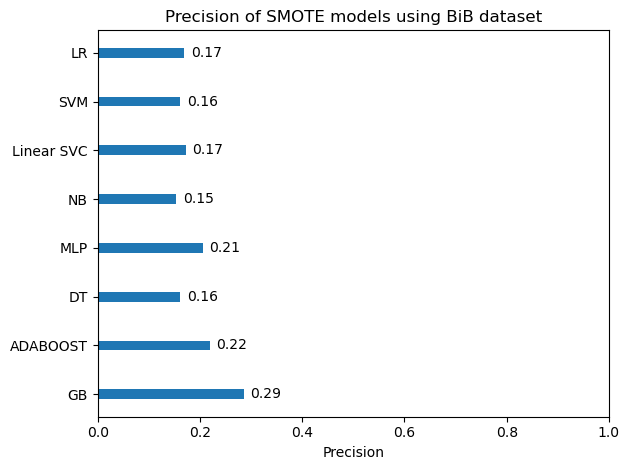

recall_SMOTE.png


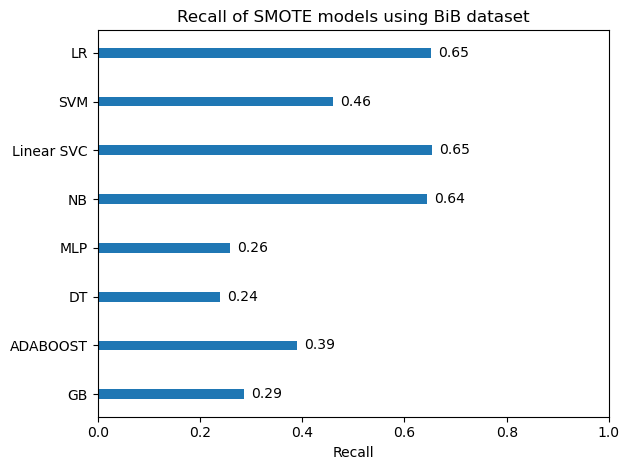

f05_SMOTE.png


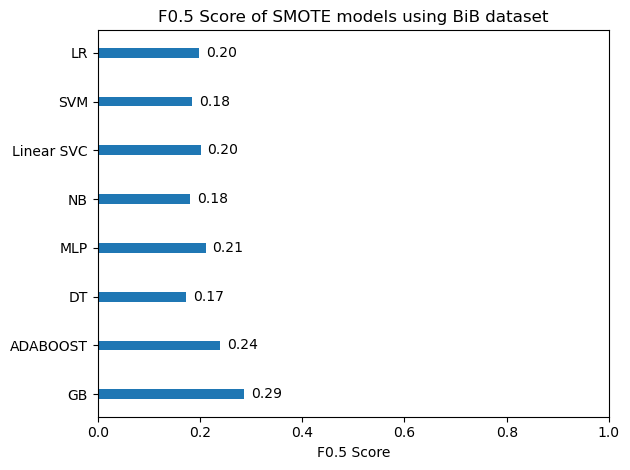

In [16]:
oneGroupBarChart(precision_sm, "Precision", "Precision of SMOTE models using BiB dataset", "precision_SMOTE")
oneGroupBarChart(recall_sm, "Recall", "Recall of SMOTE models using BiB dataset", "recall_SMOTE")
oneGroupBarChart(f05_sm, "F0.5 Score", "F0.5 Score of SMOTE models using BiB dataset", "f05_SMOTE")

sm_precision-recall.png


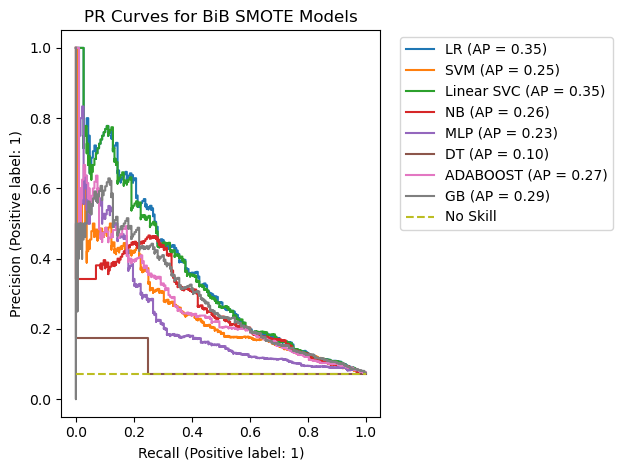

sm_roc.png


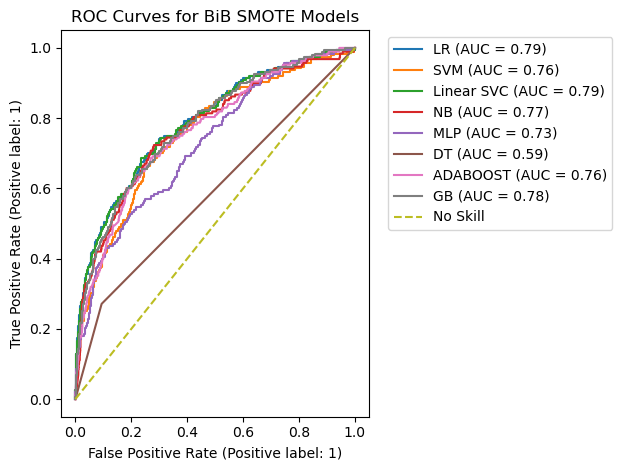

In [17]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

#plot ROC curves for all RUS models
plotPrecisionRecallCurves(X_train_sm, X_test, y_train_sm, y_test, 
                          "PR Curves for BiB SMOTE Models", "sm_precision-recall")

#plot ROC curves for all RUS models
plotROCCurves(X_train_sm, X_test, y_train_sm, y_test,
                          "ROC Curves for BiB SMOTE Models", "sm_roc")


## BiB: Imbalanced vs RUS vs SMOTE

In [19]:
# plot comparison between imbalanced, RUS and SMOTE models

resampling_precision_bib.png


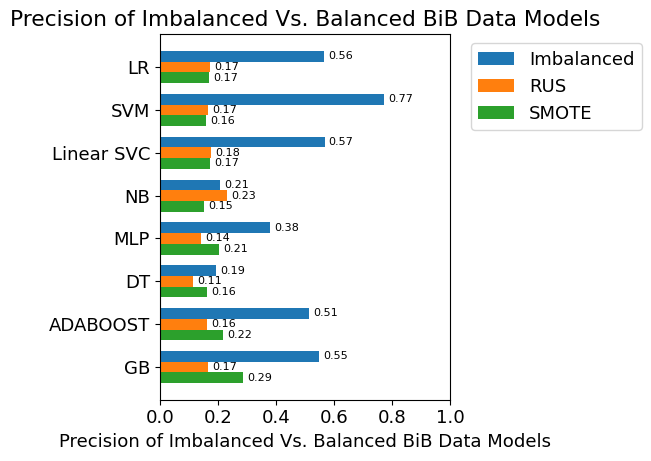

resampling_recall_bib.png


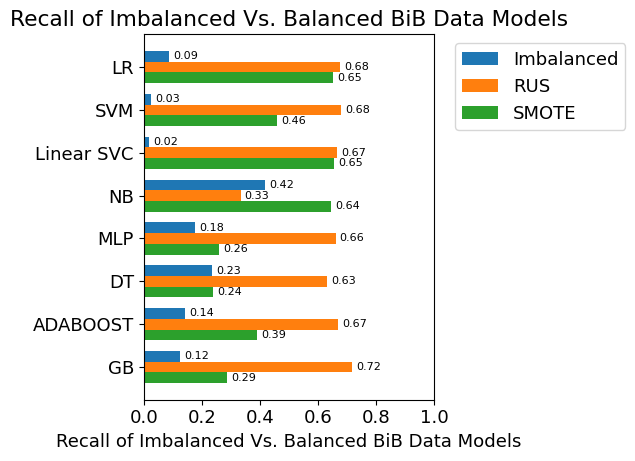

resampling_f05_bib.png


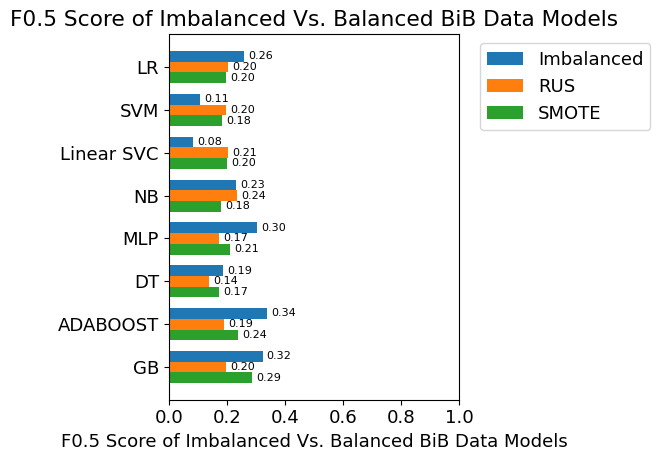

In [37]:
threeGroupsBarChart(precision_results, "Imbalanced",
                    precision_rus, "RUS",
                    precision_sm, "SMOTE",
                    "Precision of Imbalanced Vs. Balanced BiB Data Models" , "resampling_precision_bib")


threeGroupsBarChart(recall_results, "Imbalanced",
                    recall_rus, "RUS",
                    recall_sm, "SMOTE",
                    "Recall of Imbalanced Vs. Balanced BiB Data Models" , "resampling_recall_bib")


threeGroupsBarChart(f05_results, "Imbalanced",
                    f05_rus, "RUS",
                    f05_sm, "SMOTE",
                    "F0.5 Score of Imbalanced Vs. Balanced BiB Data Models" , "resampling_f05_bib")

In [13]:
# do the same for BiB-GDM then make graph to compare between both

# BiB-GDM

In [21]:
# make stratified folds for cross validation
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=False)

# make feature matrix and target matrix
X = pd.read_csv('BibGDMFeaturesMatrix_Preprocessed_OHEColumnsNamed.csv')
y = pd.read_csv('BibGDMDependentVariableLGAEncoded.csv')

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

import warnings
#ignore warnings 
warnings.filterwarnings("ignore")

In [22]:
# imbalanced model results
precision_bibGDM, recall_bibGDM, auc_bibGDM, f05_bibGDM, names = compareAlgorithmsForBarChart(X_train,y_train)

# RUS results
precision_rus_bibGDM, recall_rus_bibGDM, auc_rus_bibGDM, f05_rus_bibGDM, names= compareAlgorithmsRUS(X_train, y_train)

# SMOTE results
precision_sm_bibGDM, recall_sm_bibGDM, auc_sm_bibGDM, f05_sm_bibGDM, names= compareAlgorithmsSMOTE(X_train, y_train)

## BiB-GDM and RUS

In [23]:
# plot RUS models sensitivity, precision F0.5, ROC and PR curves for BiB-GDM models

precision_RUS_bib-gdm.png


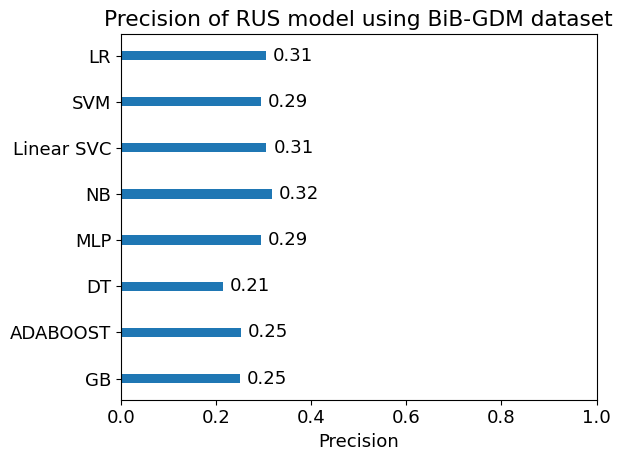

recall_RUS_bib-gdm.png


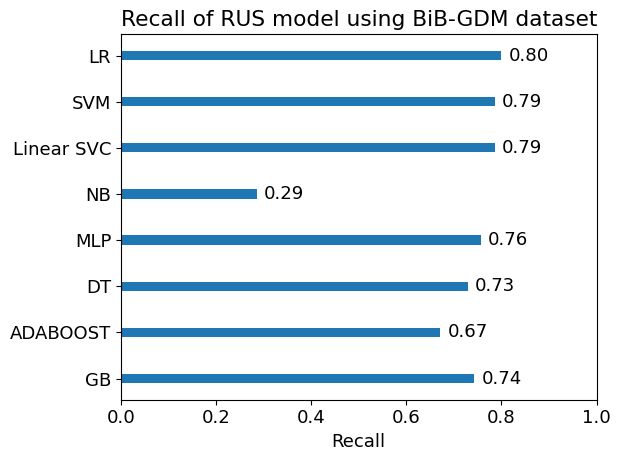

f05_RUS_bib-gdm.png


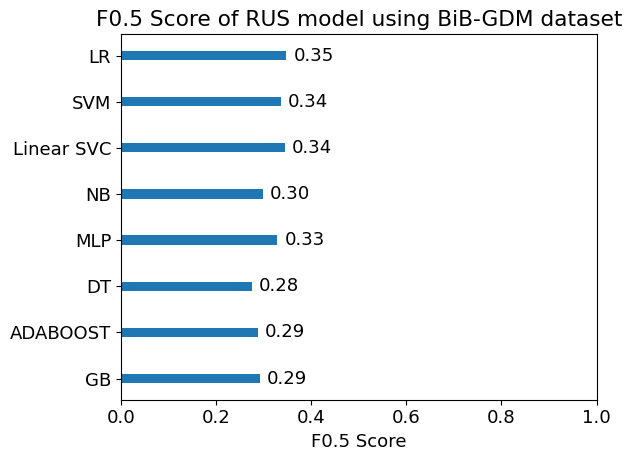

In [38]:
oneGroupBarChart(precision_rus_bibGDM, "Precision", "Precision of RUS model using BiB-GDM dataset", "precision_RUS_bib-gdm")
oneGroupBarChart(recall_rus_bibGDM, "Recall", "Recall of RUS model using BiB-GDM dataset", "recall_RUS_bib-gdm")
oneGroupBarChart(f05_rus_bibGDM, "F0.5 Score", "F0.5 Score of RUS model using BiB-GDM dataset", "f05_RUS_bib-gdm")

rus_precision-recall_bib-gdm.png


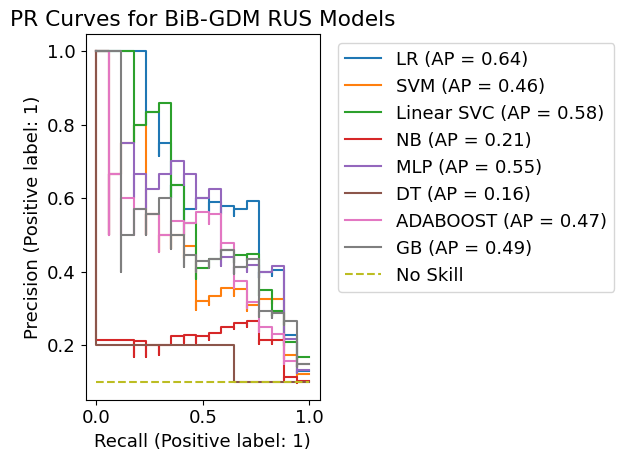

rus_roc_bib-gdm.png


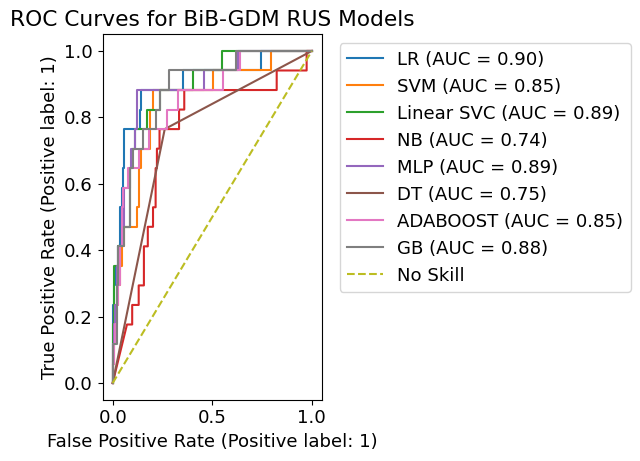

In [39]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#plot ROC curves for all RUS models
plotPrecisionRecallCurves(X_train_rus, X_test, y_train_rus, y_test, 
                          "PR Curves for BiB-GDM RUS Models", "rus_precision-recall_bib-gdm")

#plot ROC curves for all RUS models
plotROCCurves(X_train_rus, X_test, y_train_rus, y_test,
                          "ROC Curves for BiB-GDM RUS Models", "rus_roc_bib-gdm")

## BiB-GDM and SMOTE

In [26]:
# plot SMOTE models sensitivity, precision F0.5, ROC and PR curves for BiB-GDM models

precision_SMOTE_bib-gdm.png


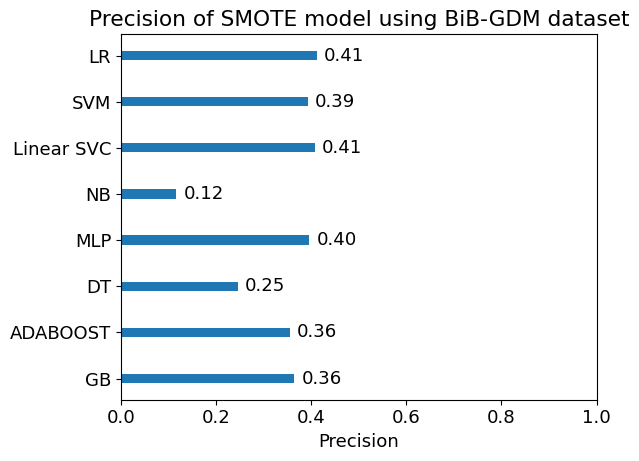

recall_SMOTE_bib-gdm.png


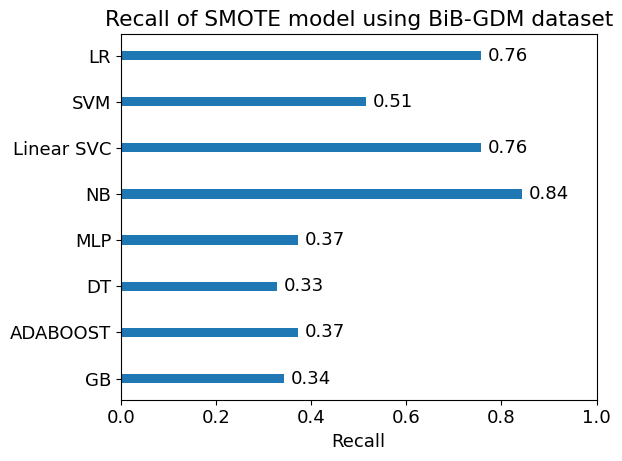

f05_SMOTE_bib-gdm.png


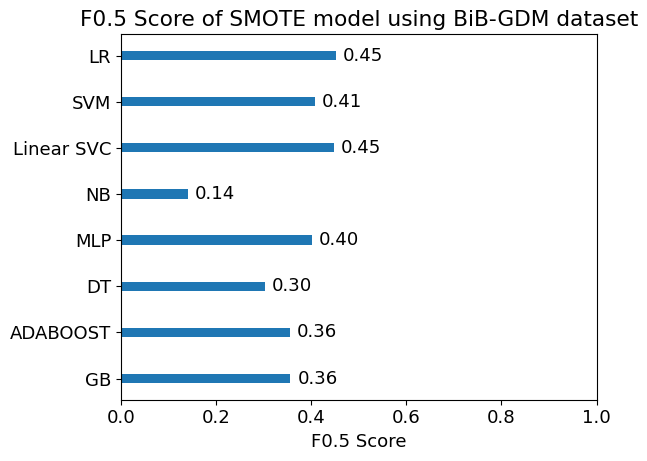

In [40]:
oneGroupBarChart(precision_sm_bibGDM, "Precision", "Precision of SMOTE model using BiB-GDM dataset", "precision_SMOTE_bib-gdm")
oneGroupBarChart(recall_sm_bibGDM, "Recall", "Recall of SMOTE model using BiB-GDM dataset", "recall_SMOTE_bib-gdm")
oneGroupBarChart(f05_sm_bibGDM, "F0.5 Score", "F0.5 Score of SMOTE model using BiB-GDM dataset", "f05_SMOTE_bib-gdm")

sm_precision-recall_bib-gdm.png


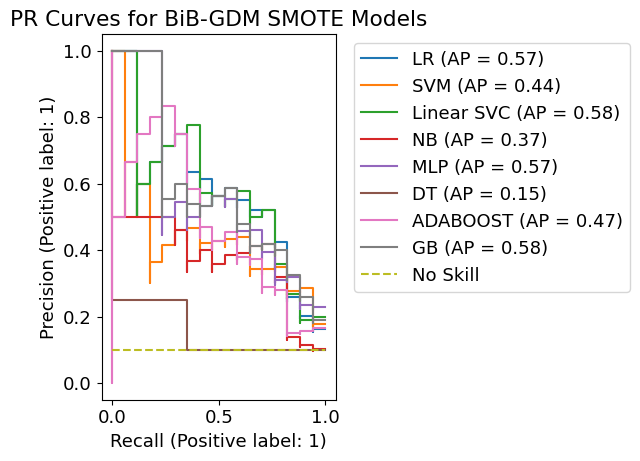

sm_roc_bib-gdm.png


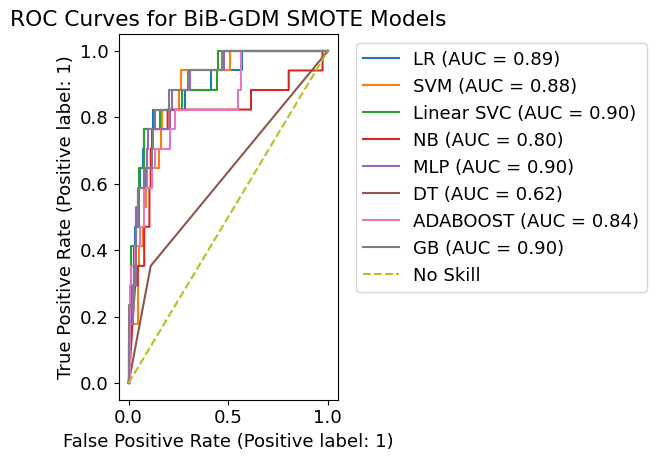

In [43]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

#plot ROC curves for all RUS models
plotPrecisionRecallCurves(X_train_sm, X_test, y_train_sm, y_test, 
                          "PR Curves for BiB-GDM SMOTE Models", "sm_precision-recall_bib-gdm")

#plot ROC curves for all RUS models
plotROCCurves(X_train_sm, X_test, y_train_sm, y_test,
                          "ROC Curves for BiB-GDM SMOTE Models", "sm_roc_bib-gdm")


## BiB-GDM: Imbalanced vs RUS vs SMOTE

resampling_precision_bib-gdm.png


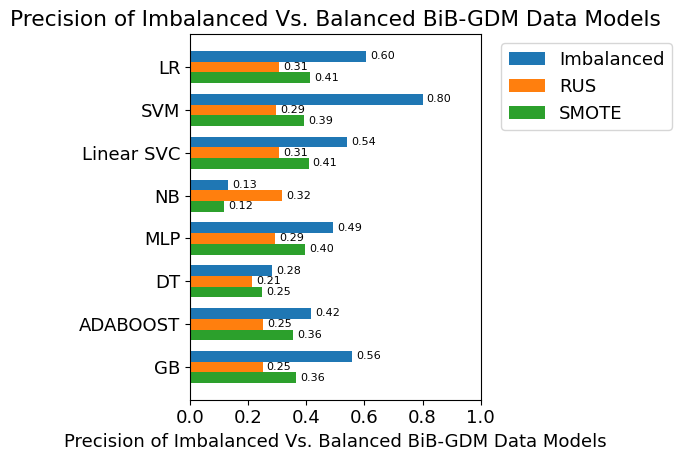

resampling_recall_bib-gdm.png


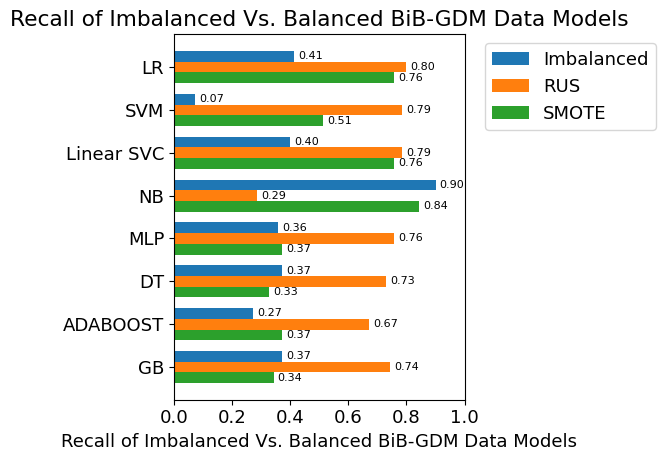

resampling_f05_bib-gdm.png


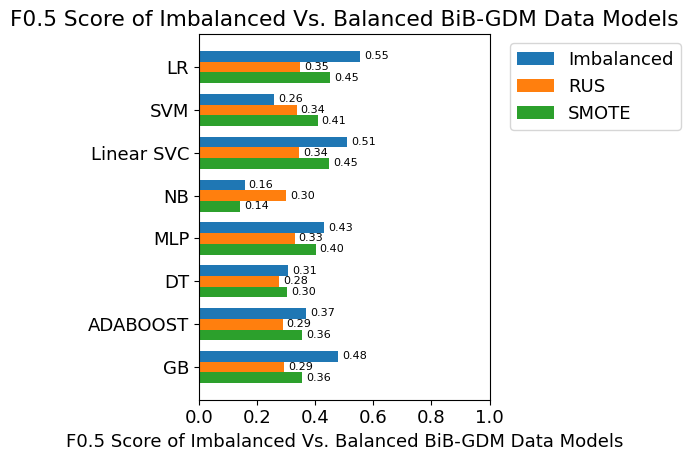

In [44]:
threeGroupsBarChart(precision_bibGDM, "Imbalanced",
                    precision_rus_bibGDM, "RUS",
                    precision_sm_bibGDM, "SMOTE",
                    "Precision of Imbalanced Vs. Balanced BiB-GDM Data Models" , "resampling_precision_bib-gdm")


threeGroupsBarChart(recall_bibGDM, "Imbalanced",
                    recall_rus_bibGDM, "RUS",
                    recall_sm_bibGDM, "SMOTE",
                    "Recall of Imbalanced Vs. Balanced BiB-GDM Data Models" , "resampling_recall_bib-gdm")


threeGroupsBarChart(f05_bibGDM, "Imbalanced",
                    f05_rus_bibGDM, "RUS",
                    f05_sm_bibGDM, "SMOTE",
                    "F0.5 Score of Imbalanced Vs. Balanced BiB-GDM Data Models" , "resampling_f05_bib-gdm")

In [14]:
# fix overlapping annotations
# plot graph comparing between oversampled bib and bib-gdm results